In [1]:
%matplotlib inline

### Load config

In [2]:
from config import BATCH_SIZE, TRAIN_SPLIT, get_path_and_names
data_dir, model_path, quant_model_path, debug_class = get_path_and_names()


In [3]:
from loader import load_split_dataset


### Comprueba la carpeta con el dataset

In [4]:
from os import listdir
import cv2
import random
from output import show_image


In [5]:
input_labels = listdir(data_dir)
input_labels[:5]

['butterfly', 'cat', 'chicken', 'cow', 'dog']

horse


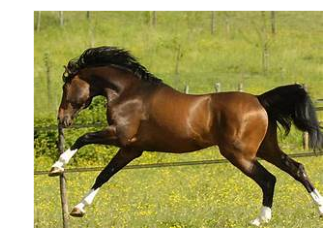

In [6]:
label = input_labels[random.randint(0, len(input_labels) - 1)]
label_images = listdir(data_dir + "/" + label)
label_images

print(label)

image = cv2.imread(data_dir + "/" + label + "/" + label_images[0])
show_image(image)


### Carga el dataset

In [7]:
train_loader, test_loader, classes = load_split_dataset(
    data_dir,
    train_split=TRAIN_SPLIT,
    batch_size=BATCH_SIZE,
)

num_classes = len(classes)

print(len(train_loader))
print(len(test_loader))
print(train_loader.batch_size)


156
67
128


### Comprueba si las clases etsán balanceadas entre train y test

In [8]:
from utils import check_balance_status

In [9]:
def check_balance():
    train_class_count = check_balance_status(train_loader, classes)
    test_class_count = check_balance_status(test_loader, classes)

    pc_mean = 0

    for tr, te in zip(train_class_count, test_class_count):
        tr_pc = tr[1] / (tr[1] + te[1]) * 100
        pc_mean += tr_pc
        print(f"{tr[0]} - TR: {tr[1]} TS: {te[1]} - PC-TR: {tr_pc:.2f}%")

    pc_mean /= len(train_class_count)
    print(f"Mean PC-TR: {pc_mean:.2f}%")


# check_balance()


In [10]:
from model import create_model, change_last_layer, export_model


### Creación del modelo para entrenar

In [11]:
model = create_model()
change_last_layer(model, num_classes)


### Entrenamiento

In [12]:
from output import plot_costs
from train import train_model

In [13]:
costs = train_model(model, train_loader)
plot_costs(costs)


Training on device: cuda
Cost at epoch 1 is 0.24537
Cost at epoch 2 is 0.11209
Cost at epoch 3 is 0.10541
Cost at epoch 4 is 0.08652
Cost at epoch 5 is 0.08234
Cost at epoch 6 is 0.07551
Cost at epoch 7 is 0.07418
Cost at epoch 8 is 0.06121
Cost at epoch 9 is 0.05983
Cost at epoch 10 is 0.05610
Cost at epoch 11 is 0.05200
Cost at epoch 12 is 0.05143
Cost at epoch 13 is 0.04259
Cost at epoch 14 is 0.05143
Cost at epoch 15 is 0.04154
Cost at epoch 16 is 0.04195
Cost at epoch 17 is 0.02997
Cost at epoch 18 is 0.03186


### Test

In [ ]:
from test import check_accuracy, predict_class

In [ ]:
print("Checking accuracy on Training Set and normal model")
check_accuracy(train_loader, model, classes)


In [ ]:
print("Checking accuracy on Test Set and normal model")
check_accuracy(test_loader, model, classes)

### Check train and test on debug class.

In [ ]:
print(f"Prediction for {debug_class} and train set")
predict_class(train_loader, model, classes, debug_class)


In [ ]:
print(f"Prediction for {debug_class} and test set")
predict_class(test_loader, model, classes, debug_class)


### Save model to further use

In [ ]:
export_model(model, model_path)
